In [101]:
# Importanmos las librerias
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [102]:
def arriba_abajo(numerosAleatorios):
    co=0
    n0=0
    n1=0
    n=len(numerosAleatorios)
    aux=0
    unos_ceros=[]
    aux2=0
    for numero in numerosAleatorios:
        if numero >=0.5:
            aux2=1
            n1+=1
        else:
            aux2=0
            n0+=1
        unos_ceros.append(aux2) 
    
    for num in unos_ceros:
        if aux != num:
            co+=1
            aux=num
    
    uc=((2*n0*n1)/n)+(1/2)
    oc=(((2*n0*n1)*((2*n0*n1)-n))/((n**2)*(n-1)))
    z0=(co-uc)/oc
    z0=round(z0,4)

    plt.figure()

    etiquetas = ['0', '1']
    plt.pie([n0, n1], labels=etiquetas, autopct='%.2f %%')
    plt.title('Cantidad de ceros y unos')
    plt.show()

    if z0>= -1.96 and z0<=1.96:
        print("c0: ",co)
        print("Zo: ", z0,"si cae dentro del intervalo de 1.96")  
    else:
        print("c0: ",co)
        print("Zo: ", z0,"no cae dentro del intervalo de 1.96")  

Realice un programa que permita validara la independencia de datos y generar una grafica de pie
que represente el total de 0 y 1 generados, además del numero de corridas generados por los
métodos de cuadrados medios, productos medios y random para validar la Hipótesis.
Emplee el siguiente nivel de significancia α=0.05
100 numeros generados
#### Las semillas para generar los números son las siguientes:

* Cuadrados medios: Xo=74731897457, D=7

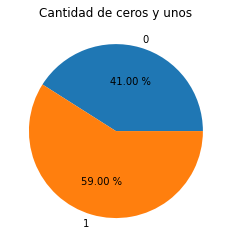

c0:  48
Zo:  -0.038 si cae dentro del intervalo de 1.96


In [103]:
def cuadradosMedios(xo, digitos):
    iteraciones = 100
    xn = xo
    aleatorios=[]
    # print("It. \t Xn \t Ui \t Rn")
    for i in range(iteraciones):
        xnn = xn**2
        txnn = str(xnn).zfill(8)
        tam = len(txnn)
        ui = int(txnn[int(tam/2-digitos/2):int(tam/2+digitos/2)])
        rn = ui / (int('9'*digitos)+1)
        aleatorios.append(rn)
        # print(str(i) + "\t" + str(xn) + "\t"+ str(ui)+"\t"+str(rn))
        xn = ui
    return(aleatorios)

arriba_abajo(cuadradosMedios(74731897457, 7))

* Congruencia lineal: a=74731897457, b=37747318974, Xo=7, M=19

It. 	 Xn 	 Ui


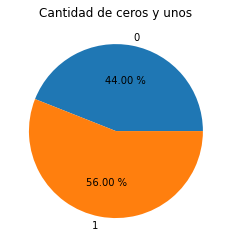

c0:  45
Zo:  -0.1989 si cae dentro del intervalo de 1.96


In [104]:
def congruencia_lineal(a,b,xo,m):
    iteraciones = 100
    xn = xo
    print("It. \t Xn \t Ui")
    aleatorios=[]
    for i in range(iteraciones):
        xnn = (a*xn+b) % m
        ui = xnn/m
        # print(str(i) + "\t"+ str(xnn)+"\t"+str(ui))
        aleatorios.append(ui)
        xn = xnn
    return aleatorios

arriba_abajo(congruencia_lineal(74731897457,37747318974,7,19))

* Random de Python semilla (01032022)

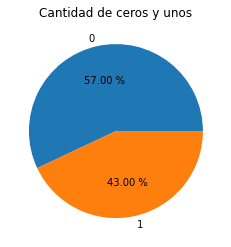

c0:  46
Zo:  -0.148 si cae dentro del intervalo de 1.96


In [109]:
def random_python(semilla):
    N=100
    numeros = []
    random.seed(semilla)
    [numeros.append(random.random())for i in range(N)]
    return numeros

arriba_abajo(random_python(1032022))

* Tauswoth q=15, r=7, l=7

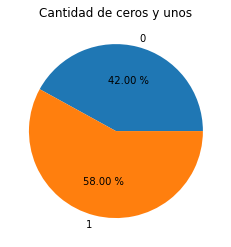

c0:  48
Zo:  -0.052 si cae dentro del intervalo de 1.96


In [106]:
def tausworth(q,h,l):
    import pandas as pd

    nBits=100*l

    generador=[]
    conversion=[]
    conversion2=[]
    result=0

    vector_l=list(range(l))
    vector_l.reverse()

    if h<q:
        for i in range(1,len(list(range(1,nBits+1)))+1):
            if i<=q:
                generador.append(1)
            else:
                aux1=i-(h+1)
                aux2=i-(q+1)
                generador.append((generador[aux1]+generador[aux2])%2)

        for i in range(l,len(generador)+1,l):
            fragmento=generador[i-l:i]
            for j in range(len(fragmento)):
                result+=fragmento[j]*2**vector_l[j]
            conversion.append(result)
            conversion2.append(result/(2**l))
            result=0
        

        df = pd.DataFrame(generador,index=list(range(1,nBits+1)))

        # print(df)
        # print(conversion)
        # print(conversion2)
        return conversion2

    else:
        print("el valor de h tiene que ser menor a q")

arriba_abajo(tausworth(15,7,7))